In [5]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Import train_test_split
from sklearn.model_selection import train_test_split  
# Split data into X and y
y = df['target']#prediction target
X = df.drop('target', axis=1) #features

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, solver='liblinear', C=1e20)

# Fit to training data
logreg.fit(X_train, y_train)

model_log = logreg.fit(X_train, y_train)
model_log

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1e+20
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [10]:
#function to calculate precision
def precision(y, y_hat):
    true_positives = ((y == 1) & (y_hat == 1)).sum()
    false_positives = ((y == 0) & (y_hat == 1)).sum()
    return true_positives / (true_positives + false_positives)


In [15]:
def recall(y, y_hat):
    # Your code here
    tp = ((y == 1) & (y_hat == 1)).sum()
    fn = ((y == 1) & (y_hat == 0)).sum()
    return tp / (tp + fn) if (tp + fn) > 0 else 0

In [17]:
def accuracy(y, y_hat):
    # Your code here
    return (y == y_hat).sum() / len(y) if len(y) > 0 else 0

In [ ]:
#function to calculate F1score
def f1_score(y, y_hat):
    prec = precision(y, y_hat)
    rec = recall(y, y_hat)
    return 2 * (prec * rec) / (prec + rec)

In [12]:
#calculate precision, recall, accuracy, and F1 score
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

In [18]:
# Test your functions here
precision_train = precision(y_train, y_hat_train)
precision_test = precision(y_test, y_hat_test)
recall_train = recall(y_train, y_hat_train)
recall_test = recall(y_test, y_hat_test)
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)
accuracy_train = accuracy(y_train, y_hat_train)
accuracy_test = accuracy(y_test, y_hat_test)    

In [19]:
#calculating metrics with sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "f1": f1
    }

In [20]:
#compare precision, recall, accuracy, and F1 score for train and test sets
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    # use i as percentage for test size (e.g. 10 -> 0.10)
    test_size = i / 100.0
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    # fit model and get predictions
    model_log = logreg.fit(X_train, y_train)
    y_hat_train = model_log.predict(X_train)
    y_hat_test = model_log.predict(X_test)
    
    # compute metrics
    metrics_train = calculate_metrics(y_train, y_hat_train)
    metrics_test = calculate_metrics(y_test, y_hat_test)

    training_precision.append(metrics_train["precision"])
    testing_precision.append(metrics_test["precision"])
    training_recall.append(metrics_train["recall"])
    testing_recall.append(metrics_test["recall"])
    training_accuracy.append(metrics_train["accuracy"])
    testing_accuracy.append(metrics_test["accuracy"])
    training_f1.append(metrics_train["f1"])
    testing_f1.append(metrics_test["f1"])


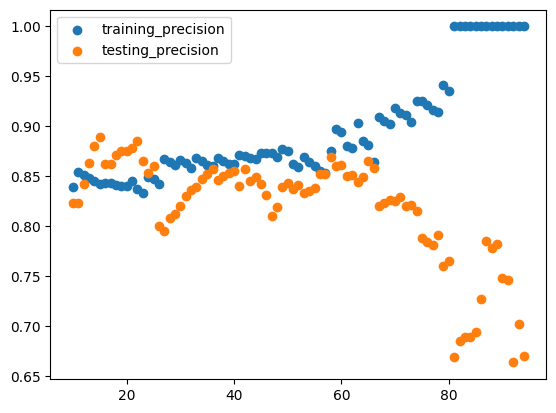

In [23]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

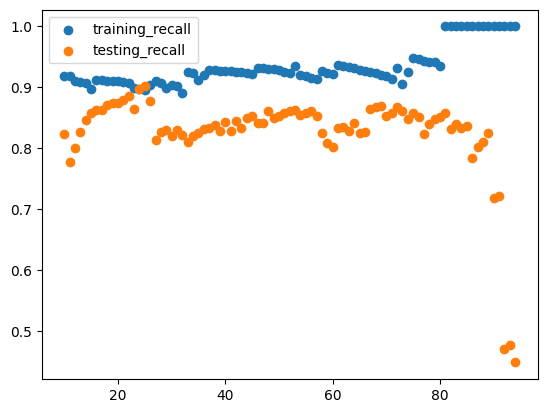

In [24]:
#train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

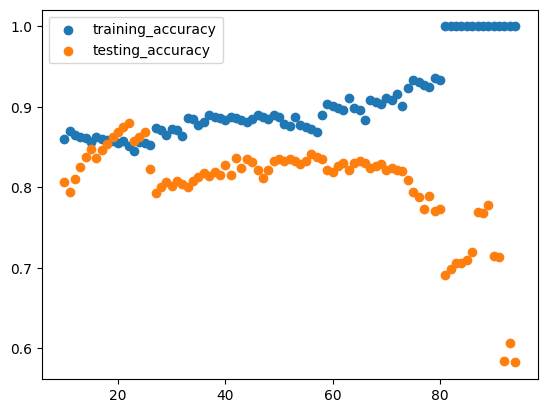

In [25]:
#train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()


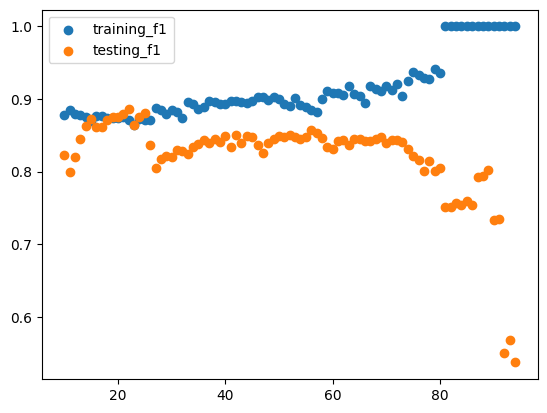

In [26]:
#train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()